In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy as sp
import databento as db 
import zstandard as zstd
from databento import DBNStore

In [3]:
notebook_dir="/home/rupam/Rupam_pcloud/Quantitative Finance/Quant_researcher_Job/Strategic_prep/My_projects/"
data_path=notebook_dir+"Mini_S_and_P_futures_data/MBO/"

In [4]:
pd.Timestamp('2022-02-02').day_name()

'Wednesday'

In [5]:
df = pd.read_parquet(data_path+next(f for f in os.listdir(data_path) if '20220202' in f),engine="pyarrow")

In [6]:
# Basic Inspection
#df.shape  # shape of the datafarame
#df.head(2) # First two rows
#df.tail(1) # Last one row
#df.columns # Name of the columns
#df.info # Info about the dataframe
#df.dtypes # Data-types of each columns
#df.describe() # Descriptive statistics for numerical columns
#df.memory_usage()
# df.index # Gives the index of the dataframe 

In [7]:
df=df.set_index('ts_event')
df=df.sort_values('ts_event')

In [8]:
df.head(5)

,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
ts_event,,,,,,,,,,,,,
1643572806508678951,160,1,27962,R,N,9223372036854775807,0,0,0,40,0,0,ESH2-ESH3
1643572806508678951,160,1,5782,A,A,4629500000000,3,0,649372590295,40,0,1652,ESH2
1643572806508678951,160,1,5782,A,A,4628750000000,3,0,649372589246,40,0,1652,ESH2
1643572806508678951,160,1,5782,A,A,4628000000000,3,0,649372588687,40,0,1652,ESH2
1643572806508678951,160,1,5782,A,A,4627250000000,3,0,649372587740,40,0,1652,ESH2


In [9]:
df=df[(df['price']!=9223372036854775807) & (df['symbol']=='ESH2') & (df['side'].isin(['A','B']))]

In [10]:
df.head(5)

,rtype,publisher_id,instrument_id,action,side,price,size,channel_id,order_id,flags,ts_in_delta,sequence,symbol
ts_event,,,,,,,,,,,,,
1643572806508678951,160,1,5782,A,A,4629500000000,3,0,649372590295,40,0,1652,ESH2
1643572806508678951,160,1,5782,A,A,4628750000000,3,0,649372589246,40,0,1652,ESH2
1643572806508678951,160,1,5782,A,A,4628000000000,3,0,649372588687,40,0,1652,ESH2
1643572806508678951,160,1,5782,A,A,4627250000000,3,0,649372587740,40,0,1652,ESH2
1643572806508678951,160,1,5782,A,A,4627000000000,1,0,649305641126,40,0,1606,ESH2


In [11]:
# pd.to_datetime(df.index) # For converting into timezones

In [12]:
df_ESH2=df[['action','side','price','size','order_id']]

In [13]:
df_ESH2.head(2)

,action,side,price,size,order_id
ts_event,,,,,
1643572806508678951,A,A,4629500000000,3,649372590295
1643572806508678951,A,A,4628750000000,3,649372589246


In [14]:
df_ESH2.columns

Index(['action', 'side', 'price', 'size', 'order_id'], dtype='object')

In [15]:
# Selection of rows and columns


#df['ts_event'] # Selecting one column by label
#df[['ts_event','rtype']] # Multiple columns
#df.iloc[1]  # Selcting column by integer position
#df.loc['2022-02-01 00:00:00+00:00']  # Selecting row by label


In [16]:
df_ESH2.index=pd.to_datetime(df_ESH2.index) # converting to real date and time stamps

In [17]:
#pd.Timedelta(minutes=30)+pd.Timedelta(minutes=60000)

In [18]:
def interval_events(start_time, intrvl_in_mins):
    return df_ESH2.loc[start_time:pd.Timestamp(start_time)+pd.Timedelta(minutes=intrvl_in_mins)]

In [19]:
df_1m=interval_events('2022-02-02 09:00:00',1)

In [20]:
#df_half[df_half['action']=='M']['order_id'].value_counts().idxmax()
#df_half[df_half['action']=='M']['order_id'].value_counts().index
#df_half[df_half['action']=='M']['order_id'].value_counts().values

In [21]:
#max_M_order=df_half[df_half['order_id']==df_half[df_half['action']=='M']['order_id'].value_counts().index[0]]

In [22]:
#max_M_order['price'].iloc[::5].plot()

In [23]:
#df_bid[df_bid['order_id']==df_bid[df_bid['action']=='T']['order_id'].value_counts().index[0]]

In [24]:
df_bid=df_1m[df_1m['side']=='B']
df_ask=df_1m[df_1m['side']=='A']

In [25]:
df_bid['price'].max()
df_ask['price'].min()

4555750000000

4554250000000

In [26]:
if pd.Timestamp('2022-02-02 09:02:00')<pd.Timestamp('2022-02-02 09:01:00'):
    print(True)

In [27]:
pd.Timedelta(milliseconds=100)

Timedelta('0 days 00:00:00.100000')

In [28]:
df_bid[df_bid['action']=='F']['size'].unique()

array([ 1,  7,  8,  2, 15,  5,  6,  3], dtype=uint32)

In [29]:
order_book={}
def recon_ob(df,order_book):
    L=0;M=0;C=0;
    for i in range(len(df.index)):
        row=df.iloc[i]
        od_id=row['order_id']
        price=row['price']
        size=row['size']
        size=int(size)
        if row['action']=='A':
            L=L+size
            order_book[od_id]=(price,size)
        if row['action']=='M':
            if od_id in order_book:
                prev_price, prev_size=order_book[od_id]
                prev_size=int(prev_size)
                if price==prev_price:
                    M=M-(prev_size-size)
                elif price>prev_price:
                    M=M+size
                else:
                    M=M-prev_size
                order_book[od_id]=(price,size)
        if row['action']=='C':
            if od_id in order_book:
                prev_price, prev_size=order_book[od_id]
                prev_size=int(prev_size)
                if size==prev_size:
                    C=C-size
                    del order_book[od_id]
                else: 
                    rem_size=prev_size-size
                    C=C-size
                    order_book[od_id]=(prev_price,rem_size)
    ofi=L+M+C
    return ofi, order_book

In [30]:
order_book={}
ofi, ob=recon_ob(df_bid,order_book)

In [31]:
np.array(list(ob.values()))[:,0].max()

4555250000000

In [32]:
ofi

706

In [33]:
df_ESH2[df_ESH2['side']=='B']

,action,side,price,size,order_id
ts_event,,,,,
2022-01-30 20:00:06.508678951,A,B,1000000000,1,649348941388
2022-01-30 20:00:06.508678951,A,B,46000000000,1,649149849085
2022-01-30 20:00:06.508678951,A,B,200000000000,1,649348158992
2022-01-30 20:00:06.508678951,A,B,368500000000,1,649232504248
2022-01-30 20:00:06.508678951,A,B,395500000000,1,649242936814
...,...,...,...,...,...
2022-02-02 23:59:58.320555123,M,B,4530500000000,1,649394311712
2022-02-02 23:59:58.320896345,M,B,4528250000000,1,649394289283
2022-02-02 23:59:58.478806097,A,B,4530500000000,1,649394312494


In [40]:
def recon_l0(df,t1,t2,dt):
    df_t1t2=df.loc[t1:t2]
    t1=pd.Timestamp(t1)
    t2=pd.Timestamp(t2)
    dt=pd.Timedelta(seconds=dt)
    l0_book={}
    order_book_bid={}
    order_book_ask={}
    while t1+dt <= t2:
        df_dt=df_t1t2[t1:t1+dt]
        df_dt_bid=df_dt[df_dt['side']=='B']
        ofi_bid, order_book_bid=recon_ob(df_dt_bid,order_book_bid)
        ob_arr_bid=np.array(list(order_book_bid.values()))
        
        df_dt_ask=df_dt[df_dt['side']=='A']
        ofi_ask, order_book_ask=recon_ob(df_dt_ask,order_book_ask)
        ob_arr_ask=np.array(list(order_book_ask.values()))

        if len(ob_arr_bid)>0 and len(ob_arr_ask)>0:
            best_bid=ob_arr_bid[:,0].max()
            best_ask=ob_arr_ask[:,0].min()
            mid_price=(best_bid+best_ask)/2
            size_bid=ob_arr_bid[ob_arr_bid[:,0]==best_bid][:,1].sum()
            size_ask=ob_arr_ask[ob_arr_ask[:,0]==best_ask][:,1].sum()
            ofi=(ofi_bid+ofi_ask)/2
            l0_book[t1]=(best_bid,best_ask,size_bid,size_ask,mid_price,ofi)
        t1=t1+dt
    df_l0=pd.DataFrame.from_dict(l0_book,orient='index',columns=['best_bid','best_ask','size_bid','size_ask','mid_price','OFI'])
    df_l0.index.name='ts_event'
    return df_l0

In [64]:
df_l0=recon_l0(df_ESH2,'2022-02-02 09:00:00','2022-02-02 09:30:00',10)

In [97]:
df_l0

,best_bid,best_ask,size_bid,size_ask,mid_price,OFI
ts_event,,,,,,
2022-02-02 09:00:00,4555250000000,4555500000000,7,2,4.555375e+12,NaN
2022-02-02 09:00:10,4554750000000,4555000000000,5,19,4.554875e+12,288.5
2022-02-02 09:00:20,4555500000000,4555750000000,14,4,4.555625e+12,133.0
2022-02-02 09:00:30,4555000000000,4555500000000,24,13,4.555250e+12,70.0
2022-02-02 09:00:40,4555250000000,4555500000000,12,12,4.555375e+12,-16.5
...,...,...,...,...,...,...
2022-02-02 09:29:10,4563250000000,4563500000000,7,8,4.563375e+12,-31.0
2022-02-02 09:29:20,4563750000000,4564000000000,10,12,4.563875e+12,-7.5
2022-02-02 09:29:30,4563750000000,4564250000000,14,12,4.564000e+12,37.0


In [65]:
df_l0['OFI']=df_l0['OFI'].shift(1)

In [81]:
delP=df_l0['mid_price'].diff().to_numpy()*1e-9

In [82]:
ofi=df_l0['OFI'].to_numpy()

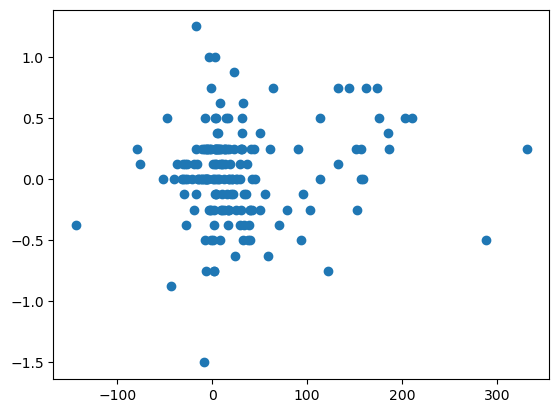

In [83]:
plt.scatter(ofi,delP)

In [84]:
np.corrcoef(delP[1:],ofi[1:])

array([[1.        , 0.12917097],
       [0.12917097, 1.        ]])

In [91]:
beta=np.sum((ofi[1:]-np.mean(ofi[1:]))*(delP[1:]-np.mean(delP[1:])))/np.sum((ofi[1:]-np.mean(ofi[1:]))**2)
beta0=np.mean(delP[1:])-beta*np.mean(ofi[1:])

In [92]:
beta
beta0

0.0007797102809405263

0.025178775398575437

In [96]:
SSres=np.sum((delP[1:]-(beta0+beta*ofi[1:]))**2)
SStot=np.sum((delP[1:]-np.mean(delP[1:]))**2)
1-SSres/SStot

0.016685139162536

In [98]:
# [len(half_hour_events(pd.Timestamp('2022-02-01 18:00:00')+pd.Timedelta(minutes=i),30)) for i in range(0,15*60,30)]

In [18]:
# class BasicProp:
#     def __init__(self,df):
#         self.df=df
#         self.lvl_list=lvl_lst
        
#     def mid_price(self):
#         mids={}
#         for lvl in self.lvl_list:
#             mids[f'mid_px_{lvl}']=(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])/2
#         return pd.DataFrame(mids, index=self.df.index)
        
#     def spread(self):
#         sprd={}
#         for lvl in self.lvl_list:
#             sprd[f'spread_{lvl}']=self.df[f'ask_px_{lvl}']-self.df[f'bid_px_{lvl}']
#         return pd.DataFrame(sprd, index=self.df.index)

#     def rel_spread(self):
#         rel_sprd={}
#         for lvl in self.lvl_list:
#             rel_sprd[f'rel_spread_{lvl}']=2*(self.df[f'ask_px_{lvl}']-self.df[f'bid_px_{lvl}'])/(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])
#         return pd.DataFrame(rel_sprd, index=self.df.index)

#     def ob_imbl(self):
#         imbl={}
#         for lvl in self.lvl_list:
#             imbl[f'ob_imbl_{lvl}']=self.df[f'bid_sz_{lvl}']/self.df[f'bid_sz_{lvl}']+self.df[f'ask_sz_{lvl}']
#         return pd.DataFrame(imbl, index=self.df.index)

#     def quote_return(self,case:str):
#         rtn={}
#         for lvl in self.lvl_list:
#             mid=(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])/2
#             if case =='abs':
#                 rtn[f'abs_return_{lvl}']=mid.diff()/mid.shift(1)
#             elif case =='log':
#                 rtn[f'log_return_{lvl}']=np.log(mid).diff()
#         return pd.DataFrame(rtn, index=self.df.index)

#     def volatility(self,win:int):
#         vol={}
#         for lvl in self.lvl_list:
#             mid=(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])/2
#             rtn=mid.diff()/mid.shift(1)
#             vol[f'vol_{lvl}_{win}']=rtn.rolling(window=win).std()
#         return pd.DataFrame(vol, index=self.df.index)


In [19]:
# ESH2_basic=BasicProp(df_ESH2)

In [25]:
# ESH2_basic.spread().std()*1e-9

spread_00    0.094032
spread_02    0.089995
spread_04    0.088397
spread_06    0.088070
dtype: float64

In [29]:
# ESH2_basic.ob_imbl()

,ob_imbl_00,ob_imbl_02,ob_imbl_04,ob_imbl_06
ts_event,,,,
2022-01-31 23:59:59.971733295+00:00,10.0,15.0,23.0,26.0
2022-02-01 00:00:00.000486527+00:00,10.0,15.0,23.0,26.0
2022-02-01 00:00:00.003668709+00:00,10.0,15.0,23.0,26.0
2022-02-01 00:00:00.018315709+00:00,11.0,15.0,23.0,26.0
2022-02-01 00:00:00.018439925+00:00,11.0,15.0,23.0,26.0
...,...,...,...,...
2022-02-01 23:59:58.525084963+00:00,12.0,21.0,19.0,26.0
2022-02-01 23:59:58.525086845+00:00,12.0,21.0,19.0,26.0
2022-02-01 23:59:58.525193993+00:00,12.0,21.0,19.0,26.0


In [98]:
#ESH2_basic.mid_price().iloc[::1000].plot()
#ESH2_basic.spread().iloc[::1000].plot()
#ESH2_basic.rel_spread().loc['2022-02-01 15:00:00':'2022-02-01 16:00:00'].iloc[::10000].plot()
#ESH2_basic.ob_imbl().loc['2022-02-01 15:00:00':'2022-02-01 16:00:00'].iloc[::10000].plot()
#ESH2_basic.quote_return('log').iloc[::1000].plot()
#ESH2_basic.volatility(10000).iloc[::100000].plot()